# Анализ данных, суррогатное моделирование и оптимизция в прикладных задачах #

## Введение ##

### Аннотация ###

Прогресс в сфере компьютерной техники и численных методов изменил задачи, с которыми сталкиваются современные учёные и инженеры, занимающиеся проектированием сложных технических систем.
Например, расчёт аэродинамики самолёта с требуемой для практики точностью в настоящее время может быть проведён менее чем за один час.
В результате, всё больше усилий исследователей направлено не на получение данных о характеристиках проектируемой системы, а на их анализ, интерпретацию и использование.

Предлагаемый курс посвящён методам интеллектуального анализа данных и машинного обучения, применяемым при проектировании технических систем, а также лежащим в основе этих методов разделам математики: линейной алгебре и математической статистики.
В программе содержится краткое изложение классических курсов по этим разделам, а также дополнительные главы, такие как сингулярное разложение матриц или случайные процессы.
Среди методов машинного обучения рассматриваются метод главных компонент, метод наименьших квадратов, линейная регрессия, гребневая регрессия и др.
Отдельный большой блок посвящён гауссовским процессам, а также основанным на них методам суррогатного моделирования и оптимизации.
Все рассматриваемые методы реализованы на языке Питон, а их применение проиллюстрировано на примере решения задач, взятых из реальной практики аэродинамического проектирования.

Курс ориентирован на студентов 4-го и 5-го курсов, обучающихся по специальностям &laquo;Прикладные математика и физика&raquo; и &laquo;Прикладная математика и информатика&raquo;.

### Содержание курса ###

Цель настоящего курса &mdash; дать краткий обзор методов анализа данных, суррогатного моделирования и оптимизации, которые мы (Отдел вычислительной аэродинамики Отделения аэродинамики силовых установок ЦАГИ) применяем в задачах аэродинамического проектирования, и привести несколько примеров таких задач.

Математическим базисом применяемых методов являются линейная алгебра, теория вероятностей и методы оптимизации.
Мы начнём с краткого введения в каждую из этих дисциплин и посвятим этому половину нашего курса.

1. Введение
2. Основные сведения из линейной алгебры
   - Умножение матриц (4 способа), ранг матрицы
   - Системы линейных уравнений, теорема Фредгольма
   - Псевдорешения и псевдообратные матрицы
   - Разложения матриц: $A=CR$, $A=LU$, $A=QR$
   - Собственные числа и вектора, разложение $A = X \Lambda X^{-1}$
   - Ортогональные, симметричные и положительно определённые матрицы 
   - Сингулярное разложение матрицы
3. Основные сведения из теории вероятностей
   - Элементарная теория вероятностей. Вероятностная модель, условная вероятность, формула Байеса
   - Случайные величины и их распределения. Числовые характеристики случайных величин
   - Многомерное ноормальное распределение. Ковариационная матрица, маргинальные и условные распределения
4. Машинное обучение и оптимизация
   - Линейная регрессия, гребневая регрессия, лассо Тибширани
   - Метод главных компонент
   - Методы оптимизации
5. Гауссовские случайные процессы
   - Случайные процессы: базовые понятие и примеры
   - Гауссовские случайные процессы
   - Регрессия на основе гауссовских процессов
   - Влияние параметров ядра и амплитуды шума
   - Алгоритм эффективной глобальной оптимизации

### Литература и курсы лекций ###

В основе этого курса лежит достаточно много литературы (несколько десятков источников). Многие части текста взяты из этой литературы напрямую или переведены с английского. Фактически, в настоящий момент данный курс является компиляцией материалов из различных источников с добавлением кода на Питоне и примеров из практики.

**Основные источники:**

1. Воронцов К.В. [Математические методы обучения по прецендентам (теория обучения машин)](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf). 141 c.
1. Strang G. Linear algebra and learning from data. Wellesley-Cambridge Press, 2019. 432 p.
1. Ширяев А.Н. Вероятность &mdash; 1. М.: МЦНМО, 2007. 517 с.
1. Материалы авторов [P. Roelants](https://peterroelants.github.io/) и [M. Krasser ](http://krasserm.github.io/).

**Реккомендованные курсы лекций:**

1. [Линейная алгебра](https://www.youtube.com/watch?v=WNl10xl1QT8&list=PLthfp5exSWEqSRXkZgMMzTSXL_WwMV9wK), к.ф.-м.н. Павел Александрович Кожевников, МФТИ
2. [Теория вероятностей](https://www.youtube.com/watch?v=Q3h9P7lhpNc&list=PLyBWNG-pZKx7kLBRcNW3HXG05BDUrTQVr&index=1), д.ф.-м.н. Максим Евгеньевич Широков, МФТИ
3. [Машинное обучение](https://www.youtube.com/watch?v=SZkrxWhI5qM&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=1), д.ф.-м.н. Константин Вячеславович Воронцов, ШАД (Яндекс)
4. [Matrix Methods in Data Analysis, Signal Processing, and Machine Learning](https://www.youtube.com/watch?v=Cx5Z-OslNWE&list=PLUl4u3cNGP63oMNUHXqIUcrkS2PivhN3k), prof. Gilbert Strang, MIT

---

## Три типа машинного обучения ##

**Машинное обучение** &mdash; класс методов искусственного интеллекта, характерной чертой которых является не прямое решение задачи, а обучение в процессе применения решений множества сходных задач. Для построения таких методов используются средства математической статистики, численных методов, методов оптимизации, теории вероятностей, теории графов, различные техники работы с данными в цифровой форме.

Различают три типа машинного обучения: *обучение с учителем*, *обучение без учителя* и *обучение с подкреплением*.

1. **Обучение с учителем** \
Основная задача обучения с учителем состоит в том, чтобы на маркированных *тренировочных данных* построить модель, которая позволит делать прогнозы для ранее не встречавшихся данных. Выделяют две основные задачи: классификация (ответ &mdash; метка принадлежности к классу) и регрессия (ответ &mdash; непрерывная величина).

1. **Обучение без учителя** \
В обучении без учителя мы имеем дело с немаркированными данными или данными с неизвестной структурой.
Используя методы обучения без учителя, мы можем разведать структуру данных с целью выделения содержательной информации без контроля со стороны известной результирующей переменной или функции вознаграждения.
Задачи: кластеризация, снижение размерности.

1. **Обучение с подкреплением** \
В отличии от обучения с учителем, когда мы тренируем нашу модель, зная *правильный ответ* заранее, в обучении с подкреплением мы определяем меру *вознаграждения* за выполненные агентом отдельно взятые действия.

В рамках данного курса мы будем заниматься, в основном, регрессией и оптимизацией на основе регрессии.
Но в самом начале будет полезно рассматреть типичную постановку задачи восстановления регрессии.

---

## Постановка задачи (пример) ##

> Регрессия &mdash; это наука о том, как провести линию через точки.

### Данные ###

In [1]:
# Imports
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Styles
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [3]:
# Define the data
n = 20
# Underlying relation
X_train = np.linspace(0, 1, n)  # Independent variable x
Y_true = np.sin(10*X_train)     # Dependent variable y
# Noise
np.random.seed(42)
e_std = 0.5  # Standard deviation of the noise
err = e_std * np.random.randn(n)  # Noise
# Output
Y_train = Y_true + err  # Dependent variable with noise

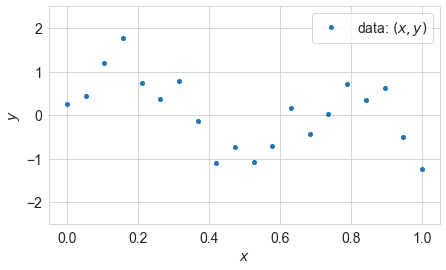

In [4]:
# Show data
figsize = (7, 4)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(X_train, Y_train, 'o', label='data: $(x,y)$')
plt.xlim((-0.05, 1.05))
plt.ylim((-2.5, 2.5))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

### Линейная регрессия ###

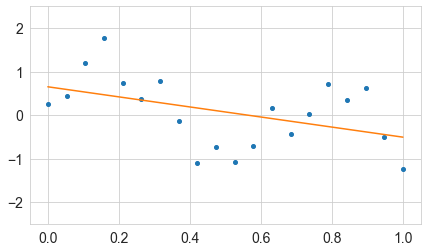

In [5]:
p1 = np.polyfit(X_train, Y_train, 1)
X_disp = np.linspace(0, 1, 1001)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(X_train, Y_train, 'o', c=cm(0), label='data: $(x,y)$')
ax.plot(X_disp, np.polyval(p1, X_disp), '-', c=cm(1), label='model 1')
plt.xlim((-0.05, 1.05))
plt.ylim((-2.5, 2.5))
plt.show()

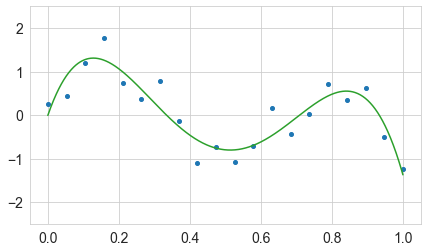

In [6]:
p2 = np.polyfit(X_train, Y_train, 4)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(X_train, Y_train, 'o', c=cm(0), label='data: $(x,y)$')
ax.plot(X_disp, np.polyval(p2, X_disp), '-', c=cm(2), label='model 2')
plt.xlim((-0.05, 1.05))
plt.ylim((-2.5, 2.5))
plt.show()

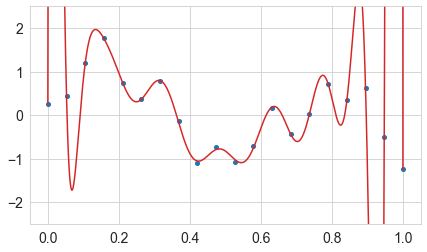

In [7]:
p3 = np.polyfit(X_train, Y_train, n-1)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(X_train, Y_train, 'o', c=cm(0), label='data: $(x,y)$')
ax.plot(X_disp, np.polyval(p3, X_disp), '-', c=cm(3), label='model 3')
plt.xlim((-0.05, 1.05))
plt.ylim((-2.5, 2.5))
plt.show()

### Регрессия на основе гауссовских процессов ###

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [9]:
# graph_support.hide_code_in_slideshow()
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, n_restarts_optimizer=20)

# Train GP model
gpr.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X_disp.reshape(-1, 1), return_cov=True)

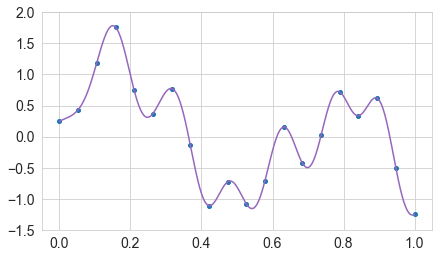

In [10]:
# Show data
fig, ax = plt.subplots(figsize=figsize)
ax.plot(X_train, Y_train, 'o', c=cm(0), label='data: $(x,y)$')
ax.plot(X_disp, mu_s, '-', c=cm(4), label='GP')
plt.xlim((-0.05, 1.05))
plt.ylim((-1.5, 2.0))
plt.show()

In [13]:
# graph_support.hide_code_in_slideshow(  )
gpr = GaussianProcessRegressor(kernel=rbf, alpha=1e-1, n_restarts_optimizer=20)

# Train GP model
gpr.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X_disp.reshape(-1, 1), return_cov=True)

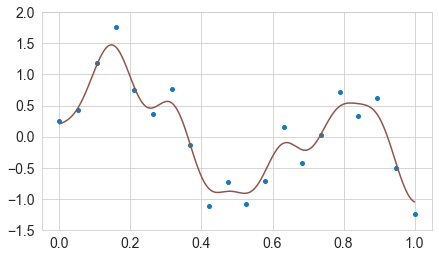

In [12]:
# Show data
fig, ax = plt.subplots(figsize=figsize)
ax.plot(X_train, Y_train, 'o', c=cm(0), label='data: $(x,y)$')
ax.plot(X_disp, mu_s, '-', c=cm(5), label='GP with err')
plt.xlim((-0.05, 1.05))
plt.ylim((-1.5, 2.0))
plt.show()

**Задача (упрощённо)**: построить функцию корректно описывающую обучающие данные и обобщающую их на неизвестные (тестовые) данные.

## Постановка задачи ##

Теперь подробнее (взято у К.В. Воронцова).

Пусть задано множество объектов $X$ и множество допустимы ответов $Y$. Мы предполагаем существование зависимости $y:X \rightarrow Y$. При этом значения функции $y_i = y(x_i)$ известны только на конечном подмножестве объектов $\{x_1, \ldots, x_l\} \subset X$.
Пары &laquo;объект &mdash; ответ&raquo; $(x_i, y_i)$ называются *прецендентами*, а совокупность пар $X^l = (x_i, y_i)_{i=1}^l$ &mdash; *обучающей выборкой*.

*Признак* $f$ объекта $x$ &mdash; это результат измерения некоторой характеристики объекта.

Пусть имеется набор признаков $f_1, \ldots, f_n$.
Вектор $(f_1, \ldots, f_n)$ называют признаковым описанием объекта $x \in X$. В дальнейшем мы не будем различать объекты из $X$ и их признаковые описания.
Совокупность признаковых описаний всех объектов выборки $X_l$, записанную в виде таблицы размера $l \times n$, называют матрицей объектов &mdash; признаков:
$$
  \mathbf{F} = 
  \begin{pmatrix}
    f_1(x_1) & \ldots & f_n(x_1) \\
    \ldots   & \ldots & \ldots   \\
    f_1(x_l) & \ldots & f_n(x_l) \\
  \end{pmatrix}.
$$

Матрица объектов &mdash; признаков является стандартным и наиболее распространённым способом представления исходных данных в прикладных задачах.

**Задача**: построить функцию $a: X \rightarrow Y$, аппроксимирующую неизвестную целевую зависимость $y$. Функция должна корректно описывать обучающие данные и должна быть успешно применима для неизвестных тестовых данных.

---

## Литература ##

1. *Воронцов К.В.* [Математические методы обучения по прецендентам (теория обучения машин)](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf). &mdash; 141 c.
1. *Рашка С.* Python и машинное обучение. &mdash; М.: ДМК Пресс, 2017. &mdash; 418 с.


In [13]:
# Versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))

Python: 3.7.7
numpy: 1.18.1
matplotlib: 3.2.1
seaborn: 0.10.1
